---
# 1. Problem Statement
---
**NSAID_Project-BeijingAirPollution**

**Currently, Beijing is suffering from:**
* China is notorious for being a major polluter. Its economic growth in the past three decades has been the fastest among major nations, which is the main factor in why China has extensive air pollution.
* China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.
* Air Pollution in Beijing is mainly dominated by coal combustion and vehicles running on the roads.
* With this amplified wealth, individuals are more capable of affording motor vehicles. The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.


**Airifi has hired you as a data science consultant. They want you to come up with actionable insights and a model that could help predict pollution.**
* They expect a model that could predict the daily pollution emission for Beijing.
* The idea is to use the model in order to take further action to reduce the pollution rate.

**Your Role**

* You are given a dataset of the past few years of the air quality (2013-2017).
* The data is from the 12 stations of Beijing that have been thoroughly observed.
* Your task is to build a regression model using the dataset.
* Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


**Project Deliverables**

* Deliverable: Predict the particulate matter from the given set of data.
* Machine Learning Task: Regression
* Target Variable: PM2.5
* Win Condition: N/A (best possible model)


**Evaluation Metric**

* The model evaluation will be based on the RMSE score.
* To learn more about RMSE and it’s Python implementation, please visit this link.

We are provided with a dataset containing all the necessary information about the air quality of Beijing.

The dataset is divided into two parts: Train, and Test sets.

**Train Set:**
* The train set contains 403776 rows and 17 columns.
* The train set contains data from 2013-16.
* The column PM2.5 is the target variable.

**Test Set:**
* The test set contains 16728 rows and 16 columns.
* The test set contains data for 2017.
* The test set doesn’t contain the PM2.5 column.
* PM2.5 needs to be predicted for the test set.

**Sample Submission File:**
* A sample submission csv file named sample_submission.csv is also provided with the dataset.
* This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.

---
# 2. Installing & Importing Libraries
---

### **2.1 Installing Libraries**

In [9]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data 
#!pip install pandas==0.25


!pip install --upgrade --force-reinstall pandas
!pip install -q datascience                  
!pip install -q pandas-profiling 

  Using cached pandas-1.2.4-cp38-cp38-macosx_10_9_x86_64.whl (10.5 MB)
     |████████████████████████████████| 227 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 4.6 MB/s eta 0:00:01
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: pytz
    Found existing installation: pytz 2020.1
    Uninstalling pytz-2020.1:
      Successfully uninstalled pytz-2020.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling p

### 2.2. **Importing Packages** 

In [1]:
# Importing Libraries
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)                           # Display all dataframe columns in outputs (it has 27 columns, which is wider than the not

---
# **3. Data Acquisition & Description**
---

In [2]:
df_AQ_org=pd.read_csv('beijing_train.csv')

In [3]:
df_AQ_org.count()

REF_NO     403776
year       403776
month      403776
day        403776
hour       403776
PM2.5      395301
PM10       397554
SO2        395000
NO2        391917
CO         383515
O3         390769
TEMP       403512
PRES       403511
DEWP       403507
RAIN       403515
wd         402387
WSPM       403538
station    403776
dtype: int64

### **3.1 Data Description**
- In this section we will get **information about the data** and see some observations.

In [4]:
df_AQ_org.describe()

REF_NO           year          month            day  \
count  403776.000000  403776.000000  403776.000000  403776.000000   
mean    16824.500000    2014.564194       6.735378      15.748217   
std      9713.352953       1.097503       3.356479       8.808891   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8412.750000    2014.000000       4.000000       8.000000   
50%     16824.500000    2015.000000       7.000000      16.000000   
75%     25236.250000    2016.000000      10.000000      23.000000   
max     33648.000000    2016.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  403776.000000  395301.000000  397554.000000  395000.000000   
mean       11.500000      79.248275     104.327897      15.733060   
std         6.922195      79.146708      90.136400      21.739455   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      21.000000      36.000000       2.000000   
50%        11.500000      55.000000      83.000000       7.000000   
75%        17.250000     110.000000     145.000000      19.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  391917.000000  383515.000000  390769.000000  403512.000000   
mean       50.352785    1214.843339      58.119327      14.088899   
std        34.771910    1124.285676      57.375966      11.303534   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       4.000000   
50%        43.000000     900.000000      45.000000      15.400000   
75%        71.000000    1500.000000      83.000000      23.500000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  403511.000000  403507.000000  403515.000000  403538.000000  
mean     1010.282534       3.157291       0.067052       1.718380  
std        10.356778      13.617273       0.837845       1.237965  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.000000      -8.000000       0.000000       0.900000  
50%      1009.800000       4.200000       0.000000       1.400000  
75%      1018.300000      15.500000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

### **3.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
df_AQ_org.shape

(403776, 18)

In [6]:
df_AQ_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


### 3.2.1 Find NULL values

In [9]:
len(df_AQ_org)-df_AQ_org.count()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

**Observation**

PM2.5 which is an output variable has 8475 rows as blank, we shall remove these
<span style="color:red">To be taken care in Data Pre Processing - 01</span>

----

In [10]:
#df_AQ_org.eq('2').any(axis=0,skipna=True)
for i in df_AQ_org.columns:
    print(i, ":", df_AQ_org[i].isin(['?']).any())

REF_NO : False
year : False
month : False
day : False
hour : False
PM2.5 : False
PM10 : False
SO2 : False
NO2 : False
CO : False
O3 : False
TEMP : False
PRES : False
DEWP : False
RAIN : False
wd : False
WSPM : False
station : False


**Observation**

There are no records with '?' in it

----

#### 3.2.1.1 Finding distribution to see if there are outliers in which case we need to replace NULLs with median

<AxesSubplot:xlabel='PM10', ylabel='Density'>

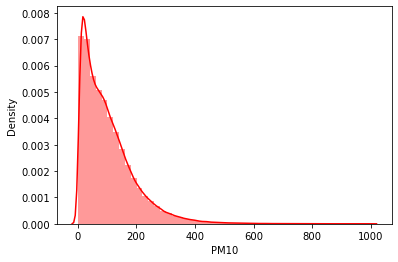

In [10]:
sns.distplot(a = df_AQ_org['PM10'], bins = 50, color = 'red')

<AxesSubplot:xlabel='SO2', ylabel='Density'>

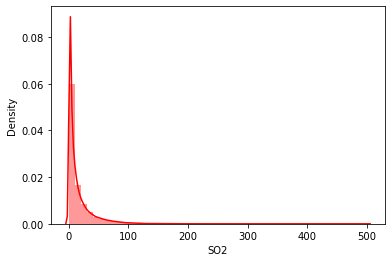

In [11]:
sns.distplot(a = df_AQ_org['SO2'], bins = 50, color = 'red')

<AxesSubplot:xlabel='NO2', ylabel='Density'>

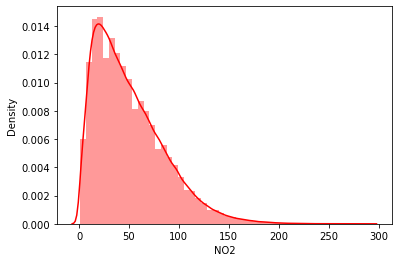

In [12]:
sns.distplot(a = df_AQ_org['NO2'], bins = 50, color = 'red')

<AxesSubplot:xlabel='CO', ylabel='Density'>

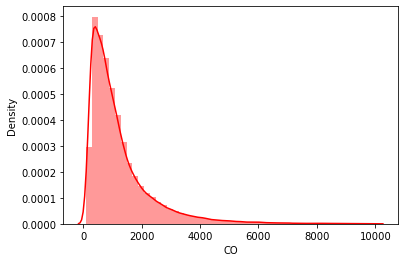

In [13]:
sns.distplot(a = df_AQ_org['CO'], bins = 50, color = 'red')

<AxesSubplot:xlabel='O3', ylabel='Density'>

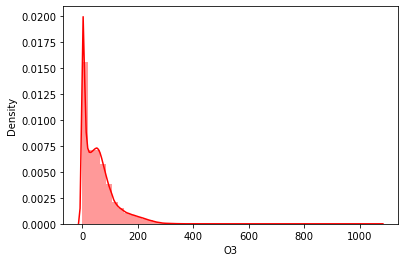

In [14]:
sns.distplot(a = df_AQ_org['O3'], bins = 50, color = 'red')

<AxesSubplot:xlabel='TEMP', ylabel='Density'>

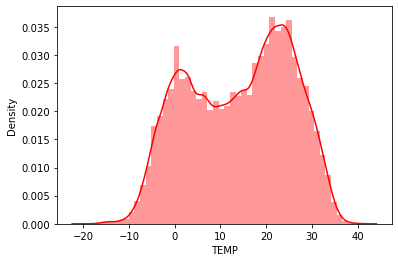

In [15]:
sns.distplot(a = df_AQ_org['TEMP'], bins = 50, color = 'red')

<AxesSubplot:xlabel='PRES', ylabel='Density'>

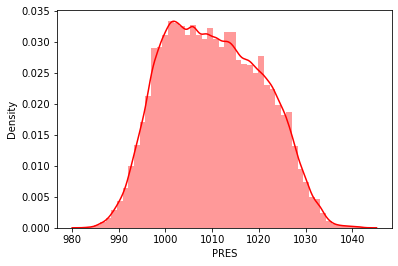

In [16]:
sns.distplot(a = df_AQ_org['PRES'], bins = 50, color = 'red')

<AxesSubplot:xlabel='DEWP', ylabel='Density'>

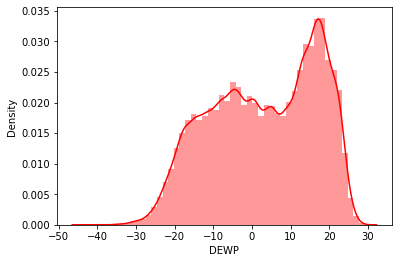

In [17]:
sns.distplot(a = df_AQ_org['DEWP'], bins = 50, color = 'red')

<AxesSubplot:xlabel='RAIN', ylabel='Density'>

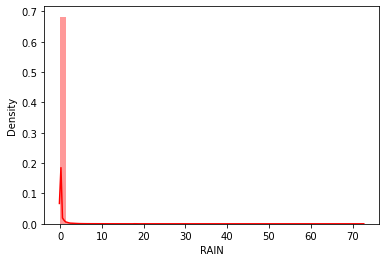

In [18]:
sns.distplot(a = df_AQ_org['RAIN'], bins = 50, color = 'red')

<AxesSubplot:xlabel='WSPM', ylabel='Density'>

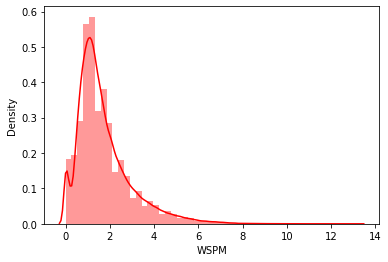

In [19]:
sns.distplot(a = df_AQ_org['WSPM'], bins = 50, color = 'red')

**Observation**

We shall replace missing values of columns "PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM" with median for above <span style="color:red">To be taken care in Data Pre Processing - 02</span>

----

In [ ]:
df_AQ_org['wd'].mode()

**Observation**

We shall replace missing values of column "wd" with mode for above <span style="color:red">To be taken care in Data Pre Processing - 03</span> Might need to address in Iteration 3

----

#### 3.2.1.2  Trying to see if there is any pattern between the wind direction and PM2.5

### 3.2.2 Find how many records have the maximum values like 999, 500, 10000 in relevant columns 

In [ ]:
df_AQ_org[df_AQ_org['PM2.5']==df_AQ_org['PM2.5'].max()]['REF_NO'].count()

In [ ]:
df_AQ_org[df_AQ_org['PM10']==df_AQ_org['PM10'].max()]['REF_NO'].count()

In [ ]:
df_AQ_org[df_AQ_org['SO2']==df_AQ_org['SO2'].max()]['REF_NO'].count()

In [ ]:
df_AQ_org[df_AQ_org['CO']==df_AQ_org['CO'].max()]['REF_NO'].count()

---
# **4. Data Pre-Processing**
---

### **4.1 Pre Profiling Report**

In [ ]:
profile = ProfileReport(df = df_AQ_org)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

---
# **5. Exploratory Data Analysis**
---

In [11]:
df_AQ_org.head()

REF_NO  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

### 5.1 Check assumptions for Linear Regression

Assumption 1: There should be a **linear** and **additive** relationship between **dependent** (response) variable and **independent (predictor)** variable(s). 

Assumption 2: The **independent** variables should not be **correlated**. Absence of this phenomenon is known as **multicollinearity**.

Assumpiton 3: There should be **no correlation** between the **residual (error)** terms. Absence of this phenomenon is known as **Autocorrelation**.

Assumpiton 4: The **error** terms must have **constant variance**. This phenomenon is known as **homoskedasticity**. The presence of non-constant **variance** is referred to **heteroskedasticity**.

Assumpiton 5: The **error** terms must be **normally** distributed.

In [193]:
## Quiz
df_AQ_org[df_AQ_org['TEMP']==0]['TEMP'].agg(['count'])

count    2642
Name: TEMP, dtype: int64

In [194]:
## Quiz
df_AQ_org[df_AQ_org['RAIN']==0]['RAIN'].agg(['count'])

count    387119
Name: RAIN, dtype: int64

In [195]:
df_AQ_org[df_AQ_org['PM10']==0]['PM10'].agg(['count'])

count    0
Name: PM10, dtype: int64

In [197]:
df_AQ_org[df_AQ_org['PRES']==0]['PRES'].agg(['count'])

count    0
Name: PRES, dtype: int64

#### 5.1.1 Assumption1 - Linear Relationship between the explanatory features and target features - Numerical features

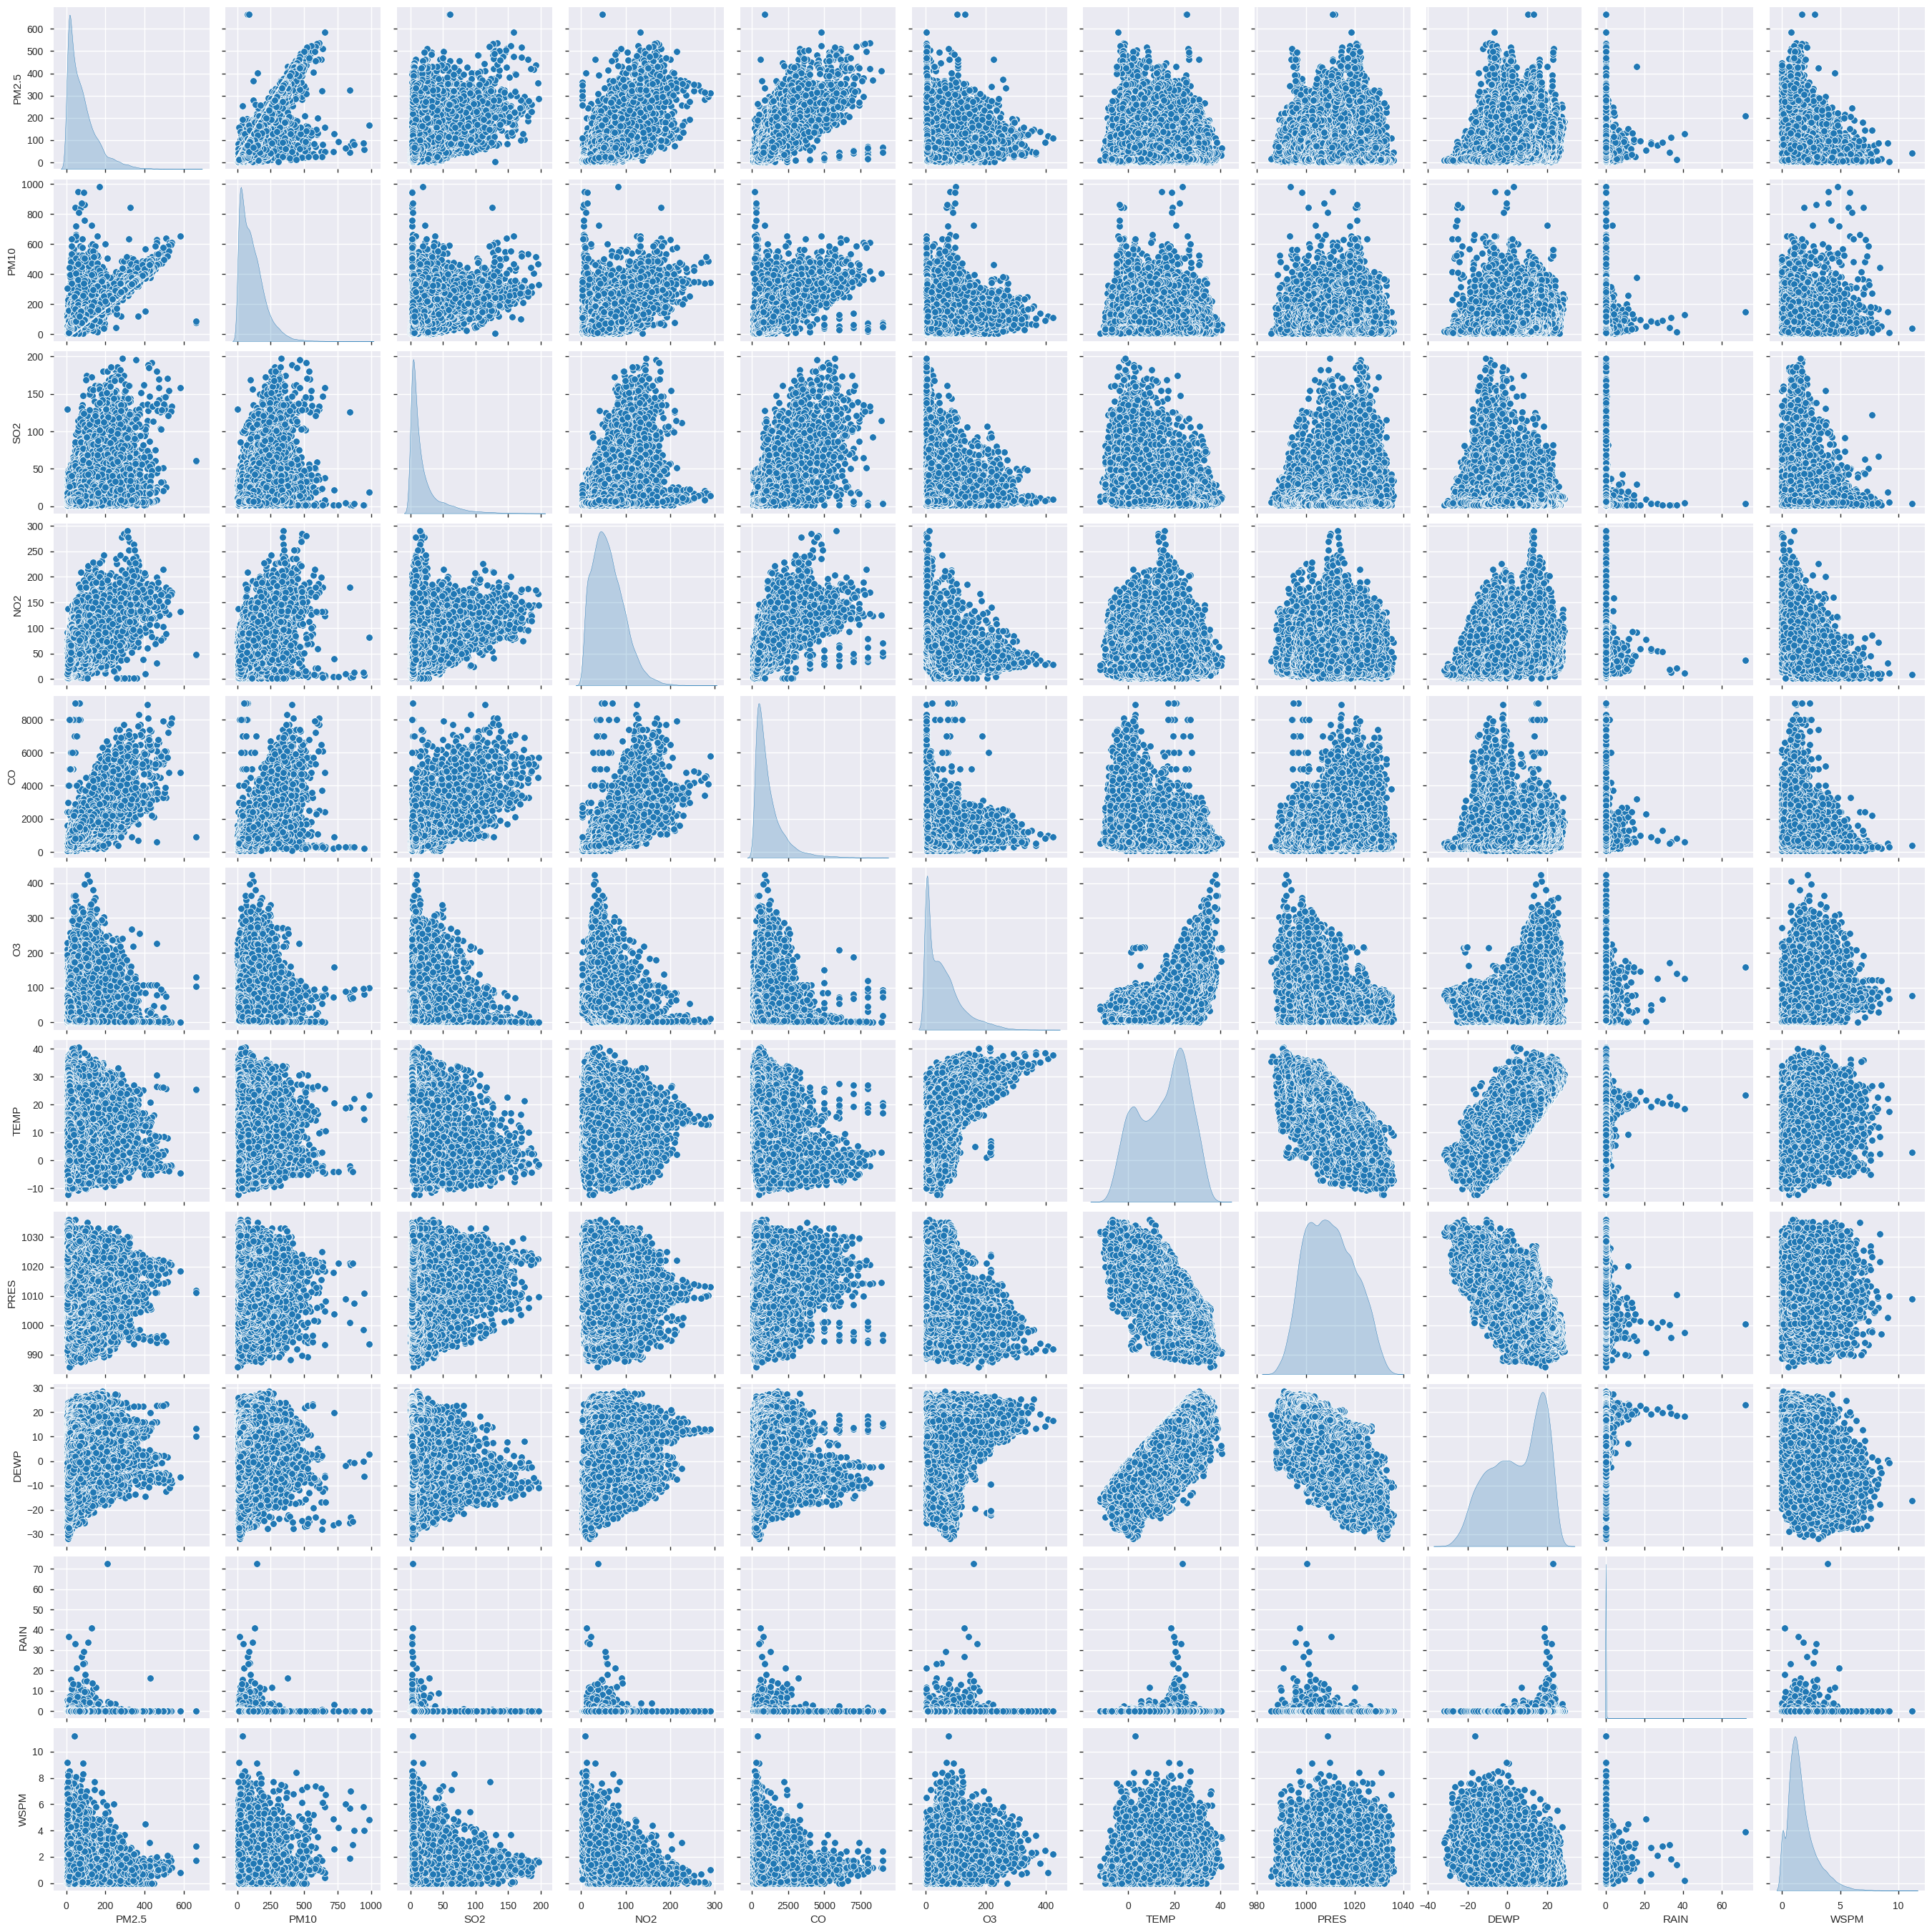

In [35]:
import seaborn as sns                                               # Importing seaborn library for interactive visualization
sns.pairplot(data=df_AQ_org[['PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP','PRES','DEWP', 'RAIN','WSPM','station']], size=2.5, diag_kind='kde')

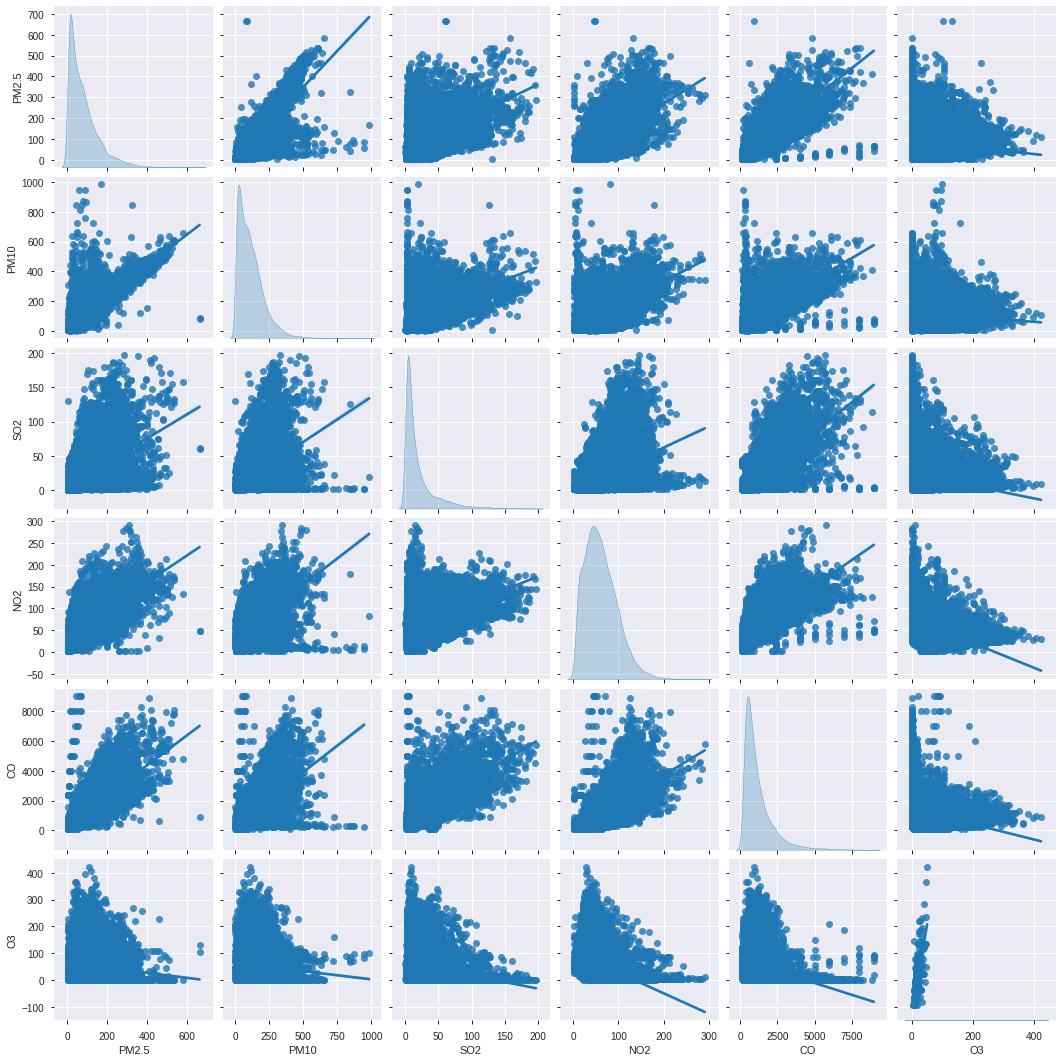

In [56]:
sns.pairplot(data=df_AQ_org[['PM2.5', 'PM10', 'SO2', 'NO2','CO','O3']], kind='reg', size=2.5, diag_kind='kde')
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

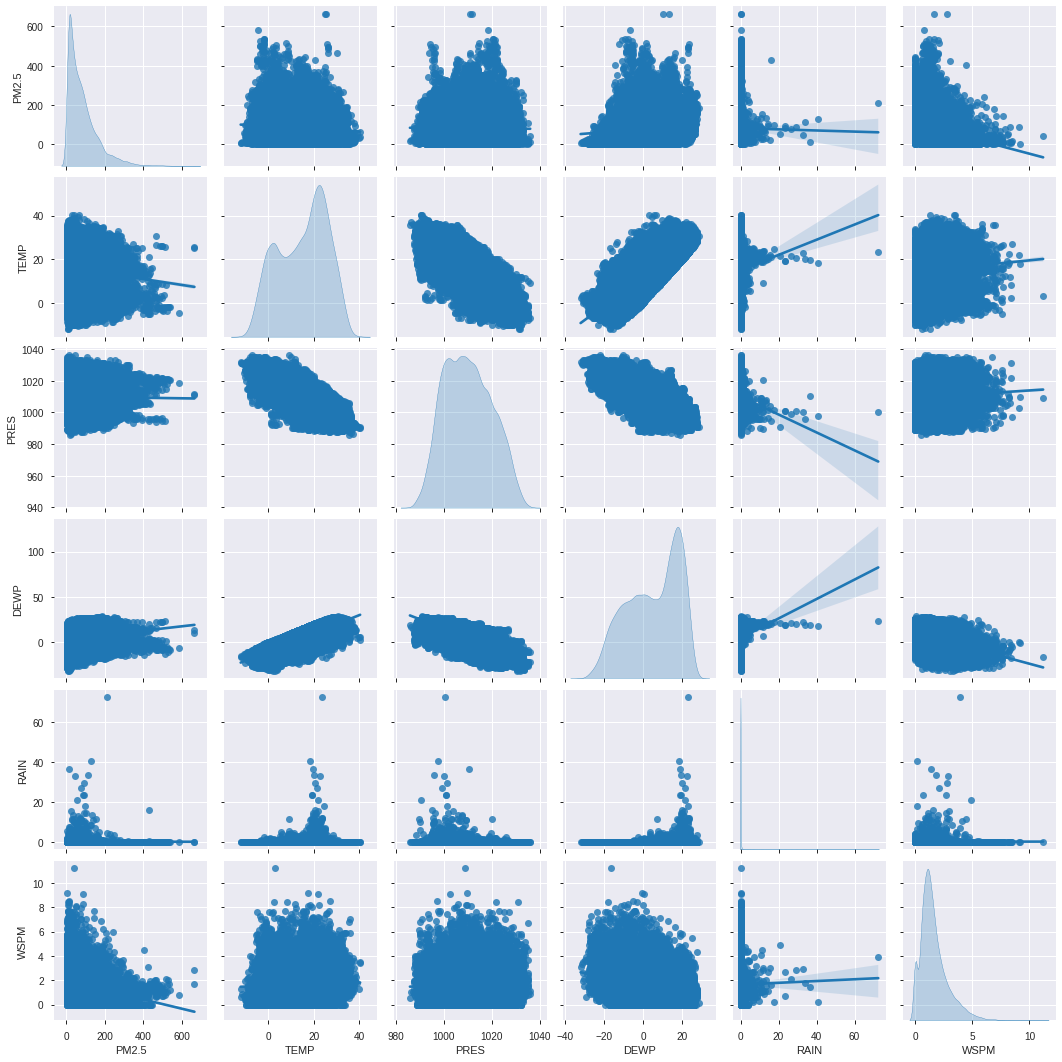

In [57]:
sns.pairplot(data=df_AQ_org[['PM2.5', 'TEMP','PRES','DEWP', 'RAIN','WSPM','station']], kind='reg', size=2.5, diag_kind='kde')

**Observation**
Assumption1: Linear Relationship between the explanatory features and target features

Drop following features:
-  REF_NO: Cannot impact the target
-  O3, TEMP, PRES, DEWP, RAIN, WSPM: as there does not seem to have a linear relationship with target
<span style="color:red">To be taken care in Data Pre Processing - 04</span>

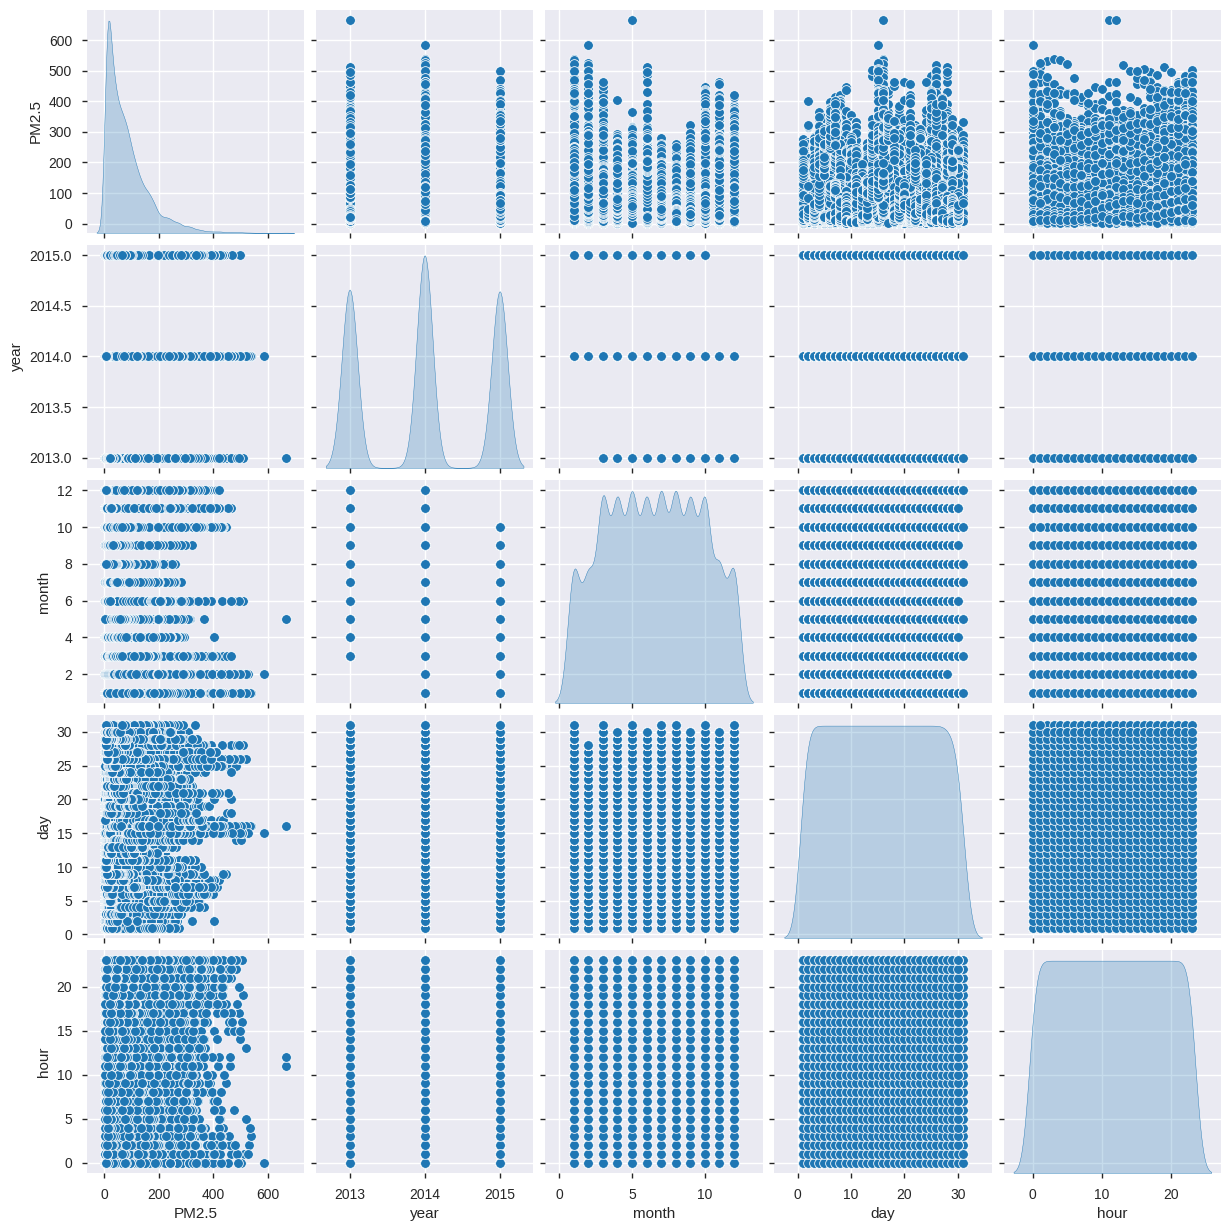

In [39]:
sns.pairplot(data=df_AQ_org[['PM2.5', 'year', 'month', 'day','hour']], size=2.5, diag_kind='kde')

**Observation**

-  PM2.5 is high in year 2016 as compared to 2013
-  PM2.5 is normally hihg in months 11,12,1,2 as compared to other months

Drop following features:
-  year, month, day, hour: as there does not seem to have a linear relationship with target

<span style="color:red">To be taken care in Data Pre Processing - 05</span>

#### 5.1.2 Assumption1 - Linear Relationship between the explanatory features and target features - Categorical features
Question: No action taken as I am not aware whether or not to retain wd variable. Can be taken care in Iteration 3.

In [26]:
df_AQ_org.groupby('wd')['PM2.5'].agg(['sum']).sort_values(by='sum',ascending=False).transpose()

wd          NE        ENE          E        ESE         SW          N  \
sum  3341182.7  3151731.5  2844942.0  2335255.0  2089854.4  1977829.1   

wd         NNE        SSW         SE          S        SSE         NW  \
sum  1867150.3  1801395.0  1786060.2  1645035.6  1570179.3  1487384.2   

wd         WSW        WNW        NNW          W  
sum  1467212.6  1315435.1  1272006.1  1242148.3

<AxesSubplot:xlabel='PM2.5', ylabel='wd'>

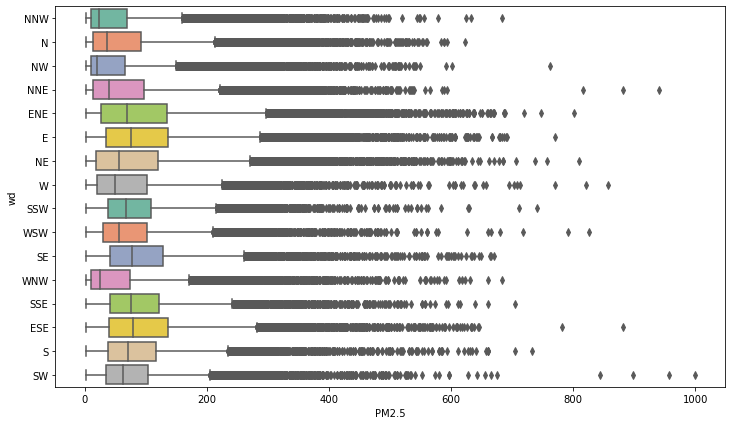

In [33]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

plt.figure(figsize=(12,7))
sns.boxplot(data=df_AQ_org, x='PM2.5',y='wd', palette="Set2")        

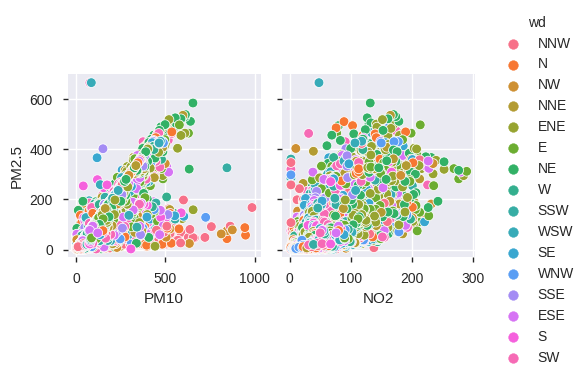

In [32]:
sns.pairplot(df_AQ_org,x_vars=['PM10','NO2'],y_vars=['PM2.5'],hue='wd')

In [7]:
df_AQ_tmp = df_AQ_org.groupby('wd')['PM2.5'].agg(['mean','median']).sort_values(by='mean',ascending=False)

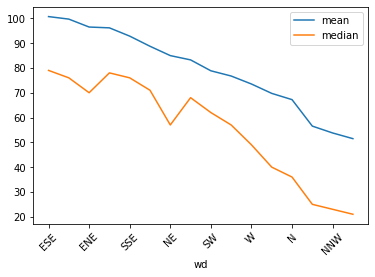

In [28]:
df_AQ_tmp.plot()
plt.xticks(rotation=45)
plt.show()

**Observation**

-  PM2.5 levels seems to decrease with westerly winds
-  Need to change these to 0,1 using One Hot Encoding <span style="color:red">To be taken care in Data Pre Processing - 06</span> Might need to address in Iteration 3. Drop 'wd' for the time being

----

In [29]:
df_AQ_station = df_AQ_org.groupby('station')['PM2.5'].agg(['mean','median']).sort_values(by='mean',ascending=False)

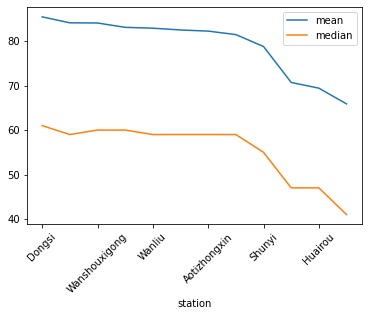

In [30]:
df_AQ_station.plot()
plt.xticks(rotation=45)
lt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Aotizhongxin'),
  Text(1, 0, 'Changping'),
  Text(2, 0, 'Dingling'),
  Text(3, 0, 'Dongsi'),
  Text(4, 0, 'Guanyuan'),
  Text(5, 0, 'Gucheng'),
  Text(6, 0, 'Huairou'),
  Text(7, 0, 'Nongzhanguan'),
  Text(8, 0, 'Shunyi'),
  Text(9, 0, 'Tiantan'),
  Text(10, 0, 'Wanliu'),
  Text(11, 0, 'Wanshouxigong')])

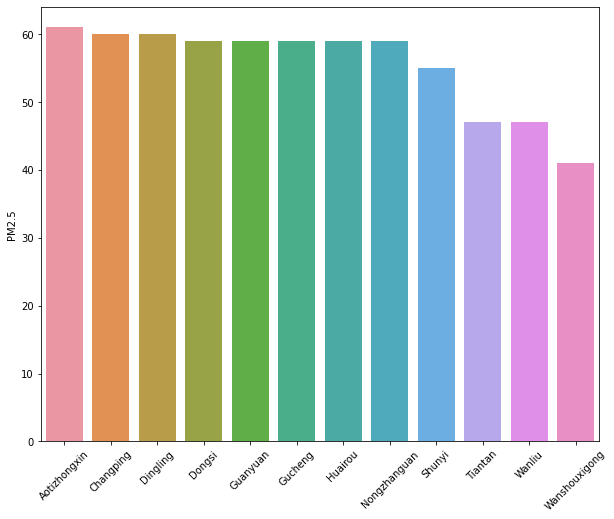

In [41]:
#INSAID
plt.figure(figsize=(10,8))
sns.barplot(df_AQ_org['station'].unique(),df_AQ_org.groupby('station')['PM2.5'].median().sort_values(ascending=False))
plt.xticks(rotation=45)

**Observation**

-  PM2.5 levels seems to decrease depending on the station
-  Need to change these to 0,1 using One Hot Encoding <span style="color:red">To be taken care in Data Pre Processing - 07</span> Might need to address in Iteration 3. Drop 'station' for the time being

----

In [12]:
## Quiz
df_AQ_year = df_AQ_org.groupby('year')['PM2.5'].agg(['mean','median']).sort_values(by='mean',ascending=False)
df_AQ_year

mean  median
year                   
2014  85.575700    63.0
2013  80.040536    59.0
2015  79.626788    52.0
2016  71.930151    48.0

In [204]:
#df_wd_tmp=df_AQ_org[['PM2.5','wd']]
#df_wd_tmp = pd.get_dummies(df_AQ_org, columns=['wd'], drop_first=True)
#sns.pairplot(data=df_wd_tmp, size=2.5, diag_kind='kde')

In [205]:
#df_wd_tmp.columns

In [206]:
#df_wd_tmp.drop(['REF_NO', 'year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2',
#       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'],axis=1, inplace=True)

In [207]:
#df_wd_tmp

#### 5.1.3 Assumption2 - No Multicollinearity between the explanatory features

In [15]:
# correlation coefficients 
df_AQ_org[['PM2.5', 'PM10','SO2','NO2','CO', 'O3', 'TEMP','PRES','DEWP', 'RAIN','WSPM',]].corr()

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.877002  0.481690  0.657830  0.786449 -0.138981 -0.129965   
PM10   0.877002  1.000000  0.461424  0.644672  0.694791 -0.100553 -0.097060   
SO2    0.481690  0.461424  1.000000  0.501572  0.553030 -0.161308 -0.332264   
NO2    0.657830  0.644672  0.501572  1.000000  0.699067 -0.469141 -0.284791   
CO     0.786449  0.694791  0.553030  0.699067  1.000000 -0.308451 -0.333796   
O3    -0.138981 -0.100553 -0.161308 -0.469141 -0.308451  1.000000  0.601033   
TEMP  -0.129965 -0.097060 -0.332264 -0.284791 -0.333796  0.601033  1.000000   
PRES   0.020842 -0.014507  0.232726  0.181141  0.194078 -0.450029 -0.807531   
DEWP   0.115970  0.065122 -0.279574 -0.039196 -0.063236  0.315303  0.814977   
RAIN  -0.014394 -0.027270 -0.040498 -0.044527 -0.012905  0.022557  0.035173   
WSPM  -0.266273 -0.174475 -0.101182 -0.396078 -0.294930  0.296219  0.041778   

           PRES      DEWP      RAIN      WSPM  
PM2.5  0.020842  0.115970 -0.014394 -0.266273  
PM10  -0.014507  0.065122 -0.027270 -0.174475  
SO2    0.232726 -0.279574 -0.040498 -0.101182  
NO2    0.181141 -0.039196 -0.044527 -0.396078  
CO     0.194078 -0.063236 -0.012905 -0.294930  
O3    -0.450029  0.315303  0.022557  0.296219  
TEMP  -0.807531  0.814977  0.035173  0.041778  
PRES   1.000000 -0.741551 -0.059488  0.059556  
DEWP  -0.741551  1.000000  0.085383 -0.294395  
RAIN  -0.059488  0.085383  1.000000  0.022335  
WSPM   0.059556 -0.294395  0.022335  1.000000

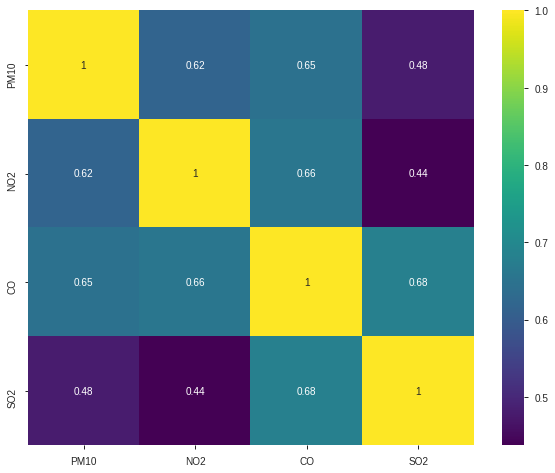

In [58]:
# Heatmap
corr_mat = df_AQ_org[['PM10','NO2','CO','SO2']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

**Observation**

Assumption2: No Multicollinearity between the explanatory features
- We are lefft with following explanatory features: PM10, NO2, SO2, CO.  

For the time being we will leave these variables as Collnearity seems to be well within limits (<0.80), though we might have to see these relations and remove one of the columns in case we are unable to get good model
<span style="color:red">To be taken care in Data Pre Processing - 08</span>
Might need to address in Iteration 3

----

# 6. Data updates (before Data Splitting)

-  <span style="color:red">Data Pre Processing - 01</span> PM2.5 which is an output variable has 8475 rows as blank, we shall remove these

In [88]:
df_AQ = df_AQ_org.copy()

-  <span style="color:red">Data Pre Processing - 01 START</span> PM2.5 which is an output variable has 8475 rows as blank, we shall remove these

In [89]:
df_AQ = df_AQ.loc[df_AQ['PM2.5'].notnull()]

In [90]:
df_AQ

REF_NO  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
0            1  2013      3    1     0    4.0    4.0   4.0    7.0   300.0   
1            2  2013      3    1     1    8.0    8.0   4.0    7.0   300.0   
2            3  2013      3    1     2    7.0    7.0   5.0   10.0   300.0   
3            4  2013      3    1     3    6.0    6.0  11.0   11.0   300.0   
4            5  2013      3    1     4    3.0    3.0  12.0   12.0   300.0   
...        ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
403771   33644  2016     12   31    19  449.0  487.0  10.0  153.0  4500.0   
403772   33645  2016     12   31    20  460.0  492.0  12.0  146.0  4100.0   
403773   33646  2016     12   31    21  463.0  498.0  12.0  141.0  4400.0   
403774   33647  2016     12   31    22  493.0  537.0  12.0  124.0  5000.0   
403775   33648  2016     12   31    23  464.0  490.0   8.0  111.0  5400.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       77.0  -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       72.0  -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...   ...     ...   ...   ...  ...   ...            ...  
403771   4.0  -1.9  1022.0  -6.1   0.0  ESE   0.9  Wanshouxigong  
403772   4.0  -2.5  1022.4  -5.5   0.0  ENE   0.7  Wanshouxigong  
403773   5.0  -3.0  1022.1  -5.3   0.0    E   0.9  Wanshouxigong  
403774   8.0  -3.0  1022.7  -5.0   0.0   SW   0.1  Wanshouxigong  
403775   7.0  -4.0  1022.6  -5.7   0.0  ENE   0.9  Wanshouxigong  

[395301 rows x 18 columns]

In [91]:
df_AQ.isna().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5          0
PM10         211
SO2         3671
NO2         6706
CO         14941
O3          8094
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1366
WSPM         237
station        0
dtype: int64

<AxesSubplot:>

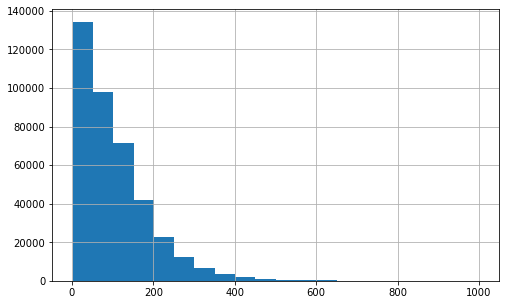

In [92]:
df_AQ['PM10'].hist(bins=20,figsize=(8, 5))

In [93]:
Q3=df_AQ.quantile(0.75)['PM10']
Q1=df_AQ.quantile(0.25)['PM10']
IQR = Q3-Q1
OutlierLeft  = df_AQ['PM10'].min()
OutlierRight = Q3 + 1.5 * IQR
print('OutlierLeft:',OutlierLeft,'OutlierRight:',OutlierRight)

OutlierLeft: 2.0 OutlierRight: 308.5


In [94]:
df_AQ[~df_AQ['PM10'].between(OutlierLeft,OutlierRight)]=df_AQ['PM10'].median()

<AxesSubplot:>

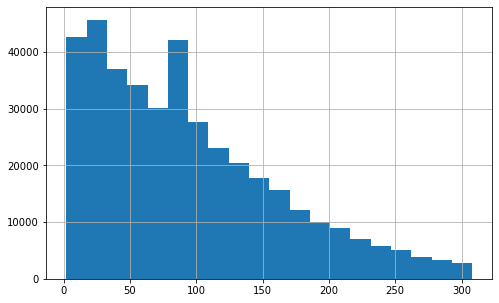

In [95]:
df_AQ['PM10'].hist(bins=20,figsize=(8, 5))

<AxesSubplot:>

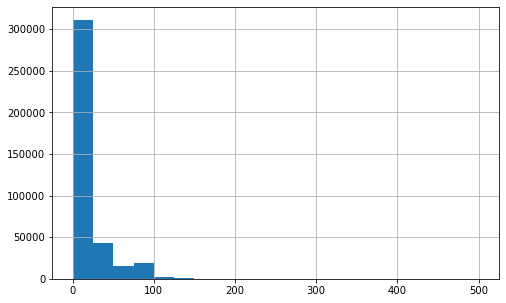

In [96]:
df_AQ['SO2'].hist(bins=20,figsize=(8, 5))

In [97]:
Q3=df_AQ.quantile(0.75)['SO2']
Q1=df_AQ.quantile(0.25)['SO2']
IQR = Q3-Q1
OutlierLeft  = df_AQ['SO2'].min()
OutlierRight = Q3 + 1.5 * IQR
print('OutlierLeft:',OutlierLeft,'OutlierRight:',OutlierRight)

OutlierLeft: 0.2856 OutlierRight: 49.5


In [98]:
df_AQ[~df_AQ['SO2'].between(OutlierLeft,OutlierRight)]=df_AQ['SO2'].median()

<AxesSubplot:>

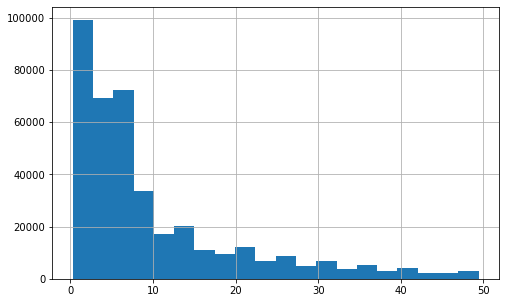

In [99]:
df_AQ['SO2'].hist(bins=20,figsize=(8, 5))

<AxesSubplot:>

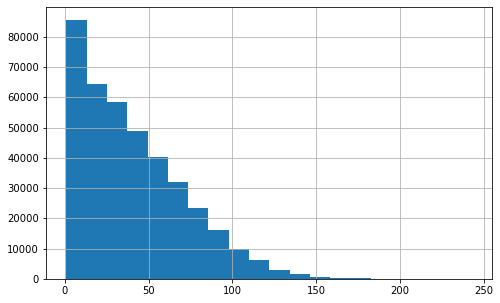

In [100]:
df_AQ['NO2'].hist(bins=20,figsize=(8, 5))

In [101]:
Q3=df_AQ.quantile(0.75)['NO2']
Q1=df_AQ.quantile(0.25)['NO2']
IQR = Q3-Q1
OutlierLeft  = df_AQ['NO2'].min()
OutlierRight = Q3 + 1.5 * IQR
print('OutlierLeft:',OutlierLeft,'OutlierRight:',OutlierRight)

OutlierLeft: 1.0265 OutlierRight: 126.0


In [102]:
df_AQ[~df_AQ['NO2'].between(OutlierLeft,OutlierRight)]=df_AQ['NO2'].median()

<AxesSubplot:>

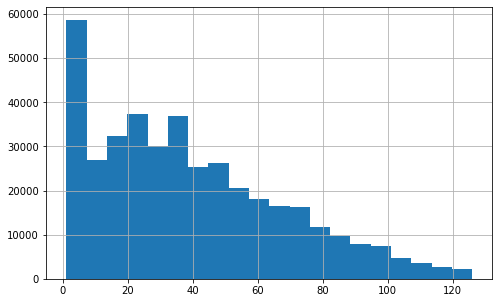

In [103]:
df_AQ['NO2'].hist(bins=20,figsize=(8, 5))

<AxesSubplot:>

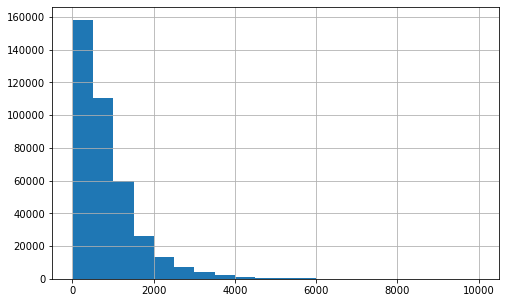

In [104]:
df_AQ['CO'].hist(bins=20,figsize=(8, 5))

In [105]:
Q3=df_AQ.quantile(0.75)['CO']
Q1=df_AQ.quantile(0.25)['CO']
IQR = Q3-Q1
OutlierLeft  = df_AQ['CO'].min()
OutlierRight = Q3 + 1.5 * IQR
print('OutlierLeft:',OutlierLeft,'OutlierRight:',OutlierRight)

OutlierLeft: 7.0 OutlierRight: 2550.0


In [106]:
df_AQ[~df_AQ['CO'].between(OutlierLeft,OutlierRight)]=df_AQ['CO'].median()

<AxesSubplot:>

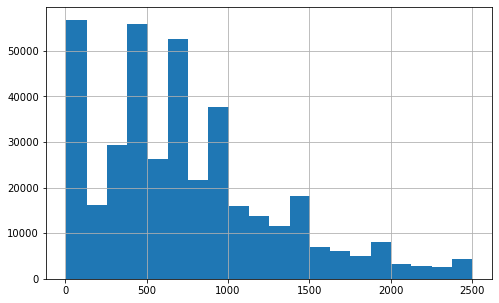

In [107]:
df_AQ['CO'].hist(bins=20,figsize=(8, 5))

-  <span style="color:green">Data Pre Processing - 01 - END</span> 8475 rows with PM2.5 as blank values are removed

----

# 7. Imputation and Data Splitting

## 7.1 Drop Columns if any before splitting data

<span style="color:red">Data Pre Processing - 04</span>
Drop following features:
-  REF_NO: Cannot impact the target
-  O3, TEMP, PRES, DEWP, RAIN, WSPM: as there does not seem to have a linear relationship with target

<span style="color:red">Data Pre Processing - 05</span>
Drop following features:
-  year, month, day, hour: as there does not seem to have a linear relationship with target

<span style="color:red">Data Pre Processing - 06</span>
-  PM2.5 levels seems to decrease with westerly winds
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'wd' for the time being

<span style="color:red">Data Pre Processing - 07</span>

-  PM2.5 levels seems to decrease depending on the station
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'station' for the time being

<span style="color:red">Data Pre Processing - 08</span>

- We are lefft with following explanatory features: PM10, NO2, SO2, CO.  

For the time being we will leave these variables as Collnearity seems to be well within limits (<0.80), though we might have to see these relations and remove one of the columns in case we are unable to get good model
Might need to address in Iteration 3

<span style="color:red">Data Pre Processing - 04 START</span>
Drop following features:
-  REF_NO: Cannot impact the target
-  O3, TEMP, PRES, DEWP, RAIN, WSPM: as there does not seem to have a linear relationship with target

In [108]:
df_AQ.drop(['REF_NO','O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'], axis = 1, inplace=True)

<span style="color:green">Data Pre Processing - 04 END</span>
Drop following features:
-  REF_NO: Cannot impact the target
-  O3, TEMP, PRES, DEWP, RAIN, WSPM: as there does not seem to have a linear relationship with target

<span style="color:red">Data Pre Processing - 05 START</span>
Drop following features:
-  year, month, day, hour: as there does not seem to have a linear relationship with target

In [109]:
df_AQ.drop(['year', 'month', 'day', 'hour'], axis = 1,inplace=True)

<span style="color:green">Data Pre Processing - 05 END</span>
Drop following features:
-  year, month, day, hour: as there does not seem to have a linear relationship with target

<span style="color:red">Data Pre Processing - 06 START</span>
-  PM2.5 levels seems to decrease with westerly winds
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'wd' for the time being

In [110]:
df_AQ.drop(['wd'], axis = 1,inplace=True)

<span style="color:green">Data Pre Processing - 06 END</span>
-  PM2.5 levels seems to decrease with westerly winds
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'wd' for the time being

<span style="color:red">Data Pre Processing - 07 START</span>

-  PM2.5 levels seems to decrease depending on the station
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'station' for the time being

In [111]:
df_AQ.drop(['station'], axis = 1,inplace=True)

<span style="color:green">Data Pre Processing - 07 END</span>

-  PM2.5 levels seems to decrease depending on the station
-  Need to change these to 0,1 using One Hot Encoding. Might need to address in Iteration 3. Drop 'station' for the time being

<span style="color:red">Data Pre Processing - 08 START</span>

- We are lefft with following explanatory features: PM10, NO2, SO2, CO.  

For the time being we will leave these variables as Collnearity seems to be well within limits (<0.80), though we might have to see these relations and remove one of the columns in case we are unable to get good model
Might need to address in Iteration 3

In [112]:
## No ation in this iteration2

<span style="color:green">Data Pre Processing - 08 END</span>

- We are lefft with following explanatory features: PM10, NO2, SO2, CO.  

For the time being we will leave these variables as Collnearity seems to be well within limits (<0.80), though we might have to see these relations and remove one of the columns in case we are unable to get good model
Might need to address in Iteration 3

## 7.2 Train and Test Data Preparation
- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [113]:
df_AQ.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO'], dtype='object')

In [114]:
feature_cols = ['PM10', 'SO2', 'NO2', 'CO']
X = df_AQ[feature_cols]

In [115]:
y = df_AQ['PM2.5']
y.head()

0    4.0
1    8.0
2    7.0
3    6.0
4    3.0
Name: PM2.5, dtype: float64

- Now we will **split** our **data** into **training** and **testing**

In [116]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [117]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (316240, 4)
y_train shape:  (316240,)

Test cases as below
X_test shape:  (79061, 4)
y_test shape:  (79061,)


In [118]:
array_sum = np.sum(X_test)
np.isnan(array_sum)

PM10    False
SO2     False
NO2     False
CO      False
dtype: bool

## 7.3 Do other imputations like replacing with MEAN/MEADN in Train and Test separately data

<span style="color:red">Data Pre Processing - 02</span>  We shall replace missing values of columns "PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM" with median for above

<span style="color:red">Data Pre Processing - 03</span> We shall replace missing values of column "wd" with mode for above. Might need to address in Iteration 3

----

<span style="color:red">Data Pre Processing - 02 START</span>  We shall replace missing values of columns "PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM" with median for above

In [119]:
X_train["PM10"].median()

62.0

In [120]:
X_train["PM10"].isna().sum()

0

In [121]:
X_train[X_train['PM10'] == X_train["PM10"].median()]['PM10'].count()

1534

<AxesSubplot:xlabel='PM10', ylabel='Density'>

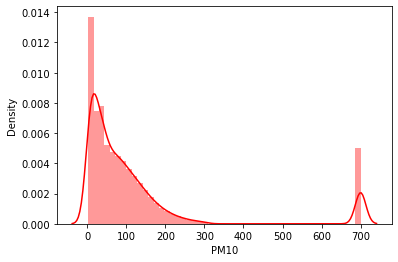

In [122]:
sns.distplot(a = X_train['PM10'], bins = 50, color = 'red')

From above we concluded that 
-  Number of records with PM10=NULL is 175
-  1551 records has PM10=83, which is the current Median for this column
-  After replacing 175 values with Median of PM10, which is 83, we can verify that there should be 1551+175=1726 records with value of 83. Also the distribution might change.

In [123]:
X_train['PM10'] = X_train['PM10'].fillna(X_train['PM10'].median())

In [124]:
X_train.isna().sum()

PM10    0
SO2     0
NO2     0
CO      0
dtype: int64

In [125]:
X_train[X_train['PM10'] == 83]['PM10'].count()

1411

<AxesSubplot:xlabel='PM10', ylabel='Density'>

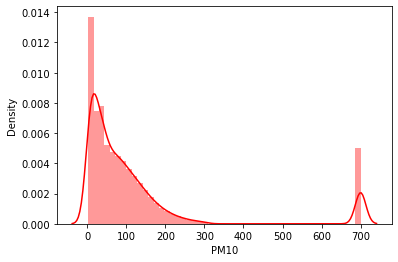

In [126]:
sns.distplot(a = X_train['PM10'], bins = 50, color = 'red')

In [127]:
# Train data
X_train['SO2'] = X_train['SO2'].fillna(X_train['SO2'].median())
X_train['NO2'] = X_train['NO2'].fillna(X_train['NO2'].median())
X_train['CO'] = X_train['CO'].fillna(X_train['CO'].median())

#X_train['O3'] = X_train['O3'].fillna(X_train['O3'].median())
#X_train['TEMP'] = X_train['TEMP'].fillna(X_train['TEMP'].median())
#X_train['PRES'] = X_train['PRES'].fillna(X_train['PRES'].median())
#X_train['DEWP'] = X_train['DEWP'].fillna(X_train['DEWP'].median())
#X_train['RAIN'] = X_train['RAIN'].fillna(X_train['RAIN'].median())
#X_train['WSPM'] = X_train['WSPM'].fillna(X_train['WSPM'].median())

In [128]:
X_train.isna().sum()

PM10    0
SO2     0
NO2     0
CO      0
dtype: int64

In [129]:
# Test data
X_test['PM10'] = X_test['PM10'].fillna(X_test['PM10'].median())
X_test['SO2'] = X_test['SO2'].fillna(X_test['SO2'].median())
X_test['NO2'] = X_test['NO2'].fillna(X_test['NO2'].median())
X_test['CO'] = X_test['CO'].fillna(X_test['CO'].median())

#X_test['O3'] = X_test['O3'].fillna(X_test['O3'].median())
#X_test['TEMP'] = X_test['TEMP'].fillna(X_test['TEMP'].median())
#X_test['PRES'] = X_test['PRES'].fillna(X_test['PRES'].median())
#X_test['DEWP'] = X_test['DEWP'].fillna(X_test['DEWP'].median())
#X_test['RAIN'] = X_test['RAIN'].fillna(X_test['RAIN'].median())
#X_test['WSPM'] = X_test['WSPM'].fillna(X_test['WSPM'].median())

In [130]:
X_test.isna().sum()

PM10    0
SO2     0
NO2     0
CO      0
dtype: int64

<span style="color:green">Data Pre Processing - 02 END</span>  We shall replace missing values of columns "PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM" with median for above


<span style="color:red">Data Pre Processing - 03 START</span> We shall replace missing values of column "wd" with mode for above. Might need to address in Iteration 3

In [131]:
# Train data
#X_train['wd'] = X_train['wd'].fillna(X_train['wd'].mode()[0])

In [132]:
# Test data
#X_test['wd'] = X_test['wd'].fillna(X_test['wd'].mode()[0])

<span style="color:green">Data Pre Processing - 03 END</span> We shall replace missing values of column "wd" with mode for above. Might need to address in Iteration 3


---
# **8. Data Standardization**
---

__Standardization__ 
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [133]:
array_sum = np.sum(X_train)
np.isnan(array_sum)

PM10    False
SO2     False
NO2     False
CO      False
dtype: bool

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
X_train

array([[-0.1978685 , -0.30348309, -0.41618625,  0.80497509],
       [ 0.0706361 , -0.14503665, -0.08938608,  2.58603902],
       [-0.63564772, -0.29216549, -0.45120056, -1.31983417],
       ...,
       [-0.43718781, -0.3091419 , -0.35199336, -0.79798244],
       [ 3.40943234,  3.62938403,  3.59295156, -0.08555687],
       [-0.40800252, -0.28650669, -0.14190754,  0.80497509]])

In [136]:
X_test

array([[ 0.49090416, -0.23557748, -0.15357897,  0.80497509],
       [-0.26791317, -0.3148007 , -0.06020749,  0.27065591],
       [-0.250402  , -0.27197941, -0.28478399, -0.26366327],
       ...,
       [-0.30877257, -0.3148007 , -0.42785769,  0.27065591],
       [-0.60062538, -0.3204595 , -0.40451482, -0.61987605],
       [ 0.38000008, -0.26387148,  0.05650685,  0.98308148]])

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Linear Regression model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **MSE**, **MAE** and **RMSE** scores.

- We will do **feature selection** and see if the scores improves. 

- We will also add a new categorical feature **Area** and assign values randomly and see if we can improve the scores.

### **8.1 Linear regression in scikit-learn**

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. **Load** the `algorithm`

2. **Instantiate** and **Fit** the model to the `training` dataset

3. **Prediction** on the `test` set

4. **Calculating** Root mean square error 

<br> 
The code block given below shows how these steps are carried out:<br/>

```
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
```

In [137]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### **8.2 Interpreting Model Coefficients**

In [138]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 97.84047147735893
Coefficients: [ 95.07418144  95.83885884 -19.33675131  14.9107585 ]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [139]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_) 
coef

[97.84047147735893,
 95.07418144294485,
 95.83885884393199,
 -19.336751312036956,
 14.910758502897902]

In [140]:
feature_cols
## feature_cols.remove('Intercept')

['Intercept', 'PM10', 'SO2', 'NO2', 'CO']

In [141]:
eq1 = zip(feature_cols, coef)
eq1
for c1,c2 in eq1:
    print(c1,c2)

Intercept 97.84047147735893
PM10 95.07418144294485
SO2 95.83885884393199
NO2 -19.336751312036956
CO 14.910758502897902


__PM2.5 = 79.29 + 51.30 `*` PM10 + 0.259 `*` SO2 + 2.15 `*` NO2 + 24.14 `*` CO__

### **8.3 Using the Model for Prediction**

In [142]:
y_pred_train = linreg.predict(X_train)

In [143]:
y_pred_train

array([ 69.99329202, 130.94423334,  -1.5489984 , ...,  21.5552767 ,
       699.07375477,  46.33831119])

In [144]:
temp_y_pred_train=pd.DataFrame(y_pred_train)
temp_y_pred_train
temp_y_pred_train.to_excel('temp_y_pred_trainV4.xlsx')

In [145]:
# make predictions on the testing set
y_pred_test = linreg.predict(X_test)

Text(0, 0.5, 'Test Predicted Values')

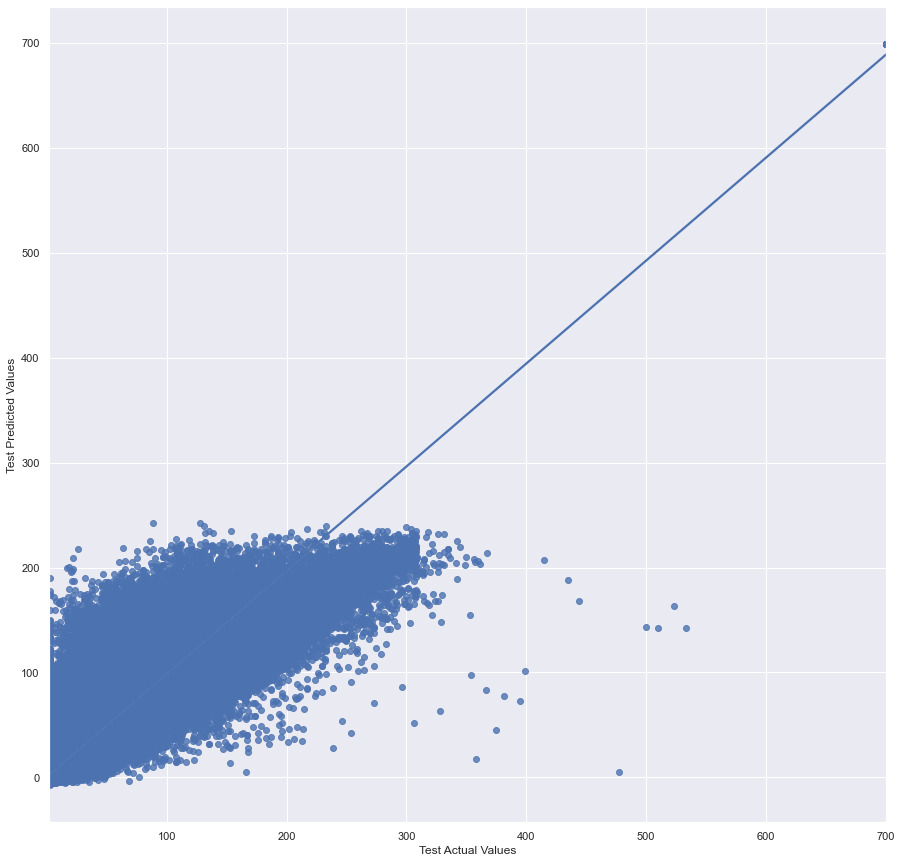

In [146]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.regplot(y_train,y_pred_train)
plt.xlabel('Test Actual Values')
plt.ylabel('Test Predicted Values')

Text(0, 0.5, 'Test Predicted Values')

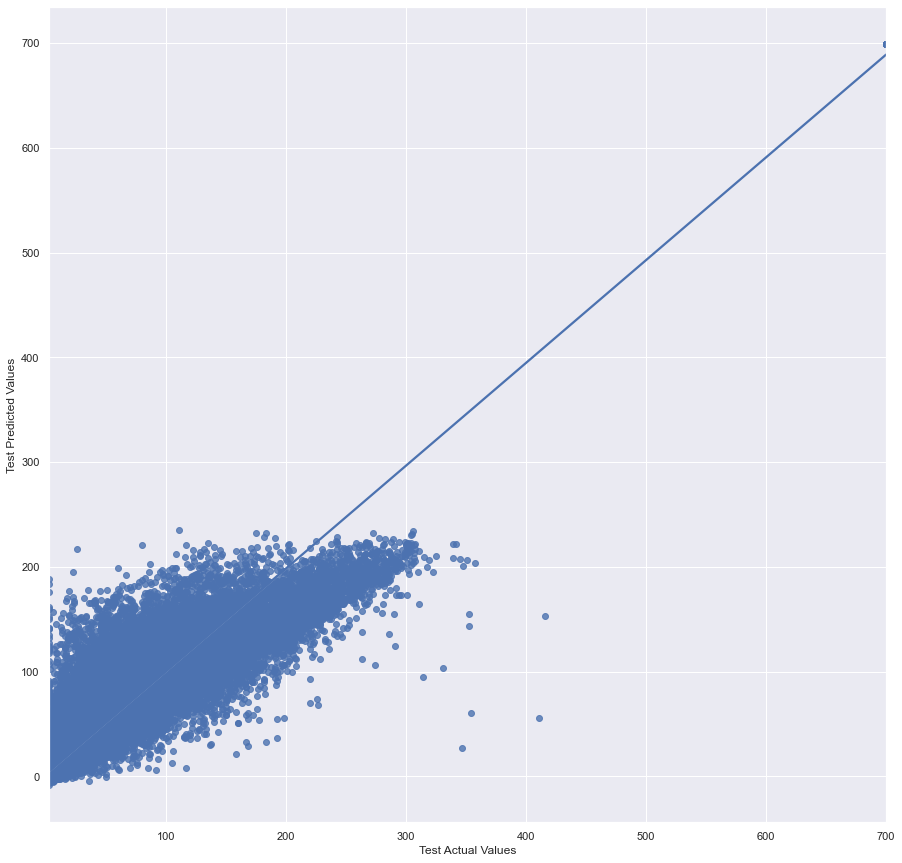

In [147]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.regplot(y_test,y_pred_test)
plt.xlabel('Test Actual Values')
plt.ylabel('Test Predicted Values')

# 9 Validatng Assumptions of Linear Regression

Assumption 3: There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

Assumption 4: The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

Assumption 5: The error terms must be normally distributed.

----

**Assumpiton 3 START :** There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.    

In [148]:
print('type(y_train)---->' , type(y_train),'\ntype(y_pred_train)---->', type(y_pred_train))

type(y_train)----> <class 'pandas.core.series.Series'> 
type(y_pred_train)----> <class 'numpy.ndarray'>


In [149]:
y_pred_train=pd.Series(y_pred_train)

In [150]:
y_pred_train

0          69.993292
1         130.944233
2          -1.548998
3           0.761262
4          68.720874
             ...    
316235    116.306650
316236     64.772242
316237     21.555277
316238    699.073755
316239     46.338311
Length: 316240, dtype: float64

In [151]:
y_train.reset_index(drop=True,inplace=True)

In [152]:
y_train

0         100.0
1          76.0
2           7.0
3           6.0
4          71.0
          ...  
316235     87.0
316236     46.0
316237     11.0
316238    700.0
316239     36.0
Name: PM2.5, Length: 316240, dtype: float64

In [153]:
df_train_error=pd.concat([y_train,y_pred_train],axis=1)
df_train_error

PM2.5           0
0       100.0   69.993292
1        76.0  130.944233
2         7.0   -1.548998
3         6.0    0.761262
4        71.0   68.720874
...       ...         ...
316235   87.0  116.306650
316236   46.0   64.772242
316237   11.0   21.555277
316238  700.0  699.073755
316239   36.0   46.338311

[316240 rows x 2 columns]

In [154]:
df_train_error.rename(columns={"PM2.5": "Y_train", 0: "Y_train_pred"},inplace=True)

In [155]:
df_train_error['train_error'] = df_train_error['Y_train'] - df_train_error['Y_train_pred']

In [156]:
df_train_error

Y_train  Y_train_pred  train_error
0         100.0     69.993292    30.006708
1          76.0    130.944233   -54.944233
2           7.0     -1.548998     8.548998
3           6.0      0.761262     5.238738
4          71.0     68.720874     2.279126
...         ...           ...          ...
316235     87.0    116.306650   -29.306650
316236     46.0     64.772242   -18.772242
316237     11.0     21.555277   -10.555277
316238    700.0    699.073755     0.926245
316239     36.0     46.338311   -10.338311

[316240 rows x 3 columns]

Text(0, 0.5, 'Train Error')

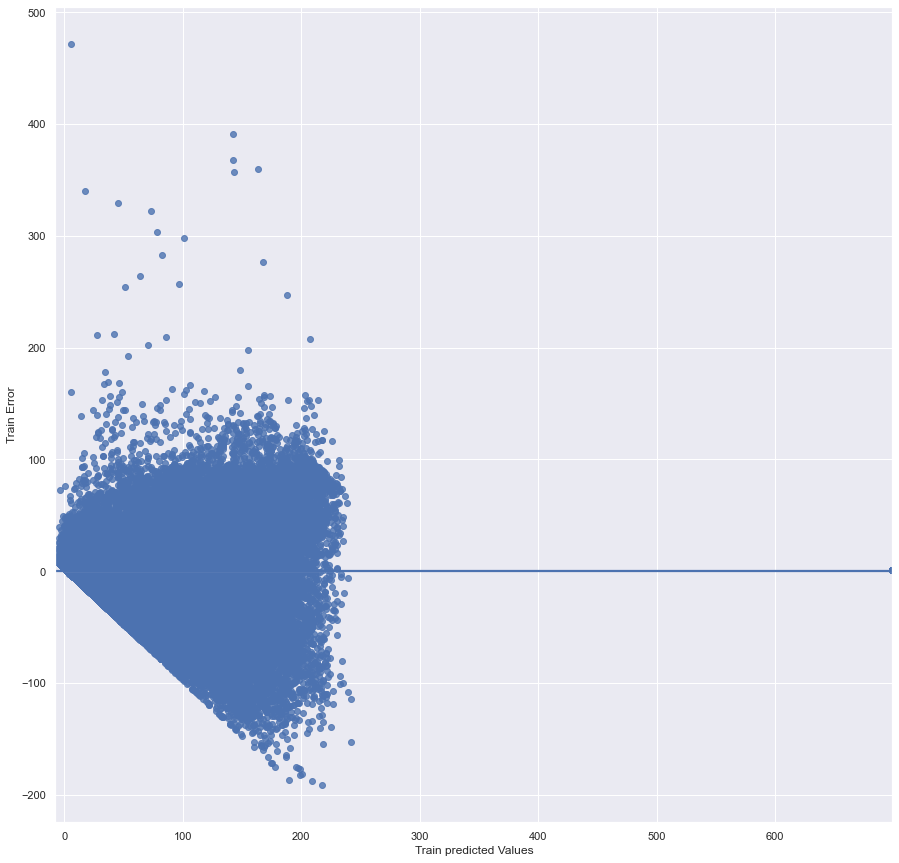

In [157]:
sns.regplot(df_train_error['Y_train_pred'],df_train_error['train_error'])
plt.xlabel('Train predicted Values')
plt.ylabel('Train Error')

In [158]:
# Error should not form any spcific pattern with X_train\??

In [159]:
# Doing all operations on Test Data

In [160]:
y_pred_test=pd.Series(y_pred_test)

In [161]:
y_pred_test

0        136.907813
1         47.398609
2         49.542887
3        126.038247
4         57.178323
            ...    
79056     77.949580
79057     49.155521
79058     50.623095
79059      8.603212
79060    122.245358
Length: 79061, dtype: float64

In [162]:
y_test.reset_index(drop=True,inplace=True)

In [163]:
y_test

0        154.0
1         36.0
2         56.0
3         83.0
4         33.0
         ...  
79056     49.0
79057     37.0
79058     63.0
79059      7.0
79060     85.0
Name: PM2.5, Length: 79061, dtype: float64

In [164]:
df_test_error=pd.concat([y_test,y_pred_test],axis=1)

In [165]:
df_test_error

PM2.5           0
0      154.0  136.907813
1       36.0   47.398609
2       56.0   49.542887
3       83.0  126.038247
4       33.0   57.178323
...      ...         ...
79056   49.0   77.949580
79057   37.0   49.155521
79058   63.0   50.623095
79059    7.0    8.603212
79060   85.0  122.245358

[79061 rows x 2 columns]

In [166]:
df_test_error.rename(columns={"PM2.5": "Y_test", 0: "Y_test_pred"},inplace=True)

In [167]:
df_test_error['test_error'] = df_test_error['Y_test'] - df_test_error['Y_test_pred']
df_test_error

Y_test  Y_test_pred  test_error
0       154.0   136.907813   17.092187
1        36.0    47.398609  -11.398609
2        56.0    49.542887    6.457113
3        83.0   126.038247  -43.038247
4        33.0    57.178323  -24.178323
...       ...          ...         ...
79056    49.0    77.949580  -28.949580
79057    37.0    49.155521  -12.155521
79058    63.0    50.623095   12.376905
79059     7.0     8.603212   -1.603212
79060    85.0   122.245358  -37.245358

[79061 rows x 3 columns]

Text(0, 0.5, 'Test Error')

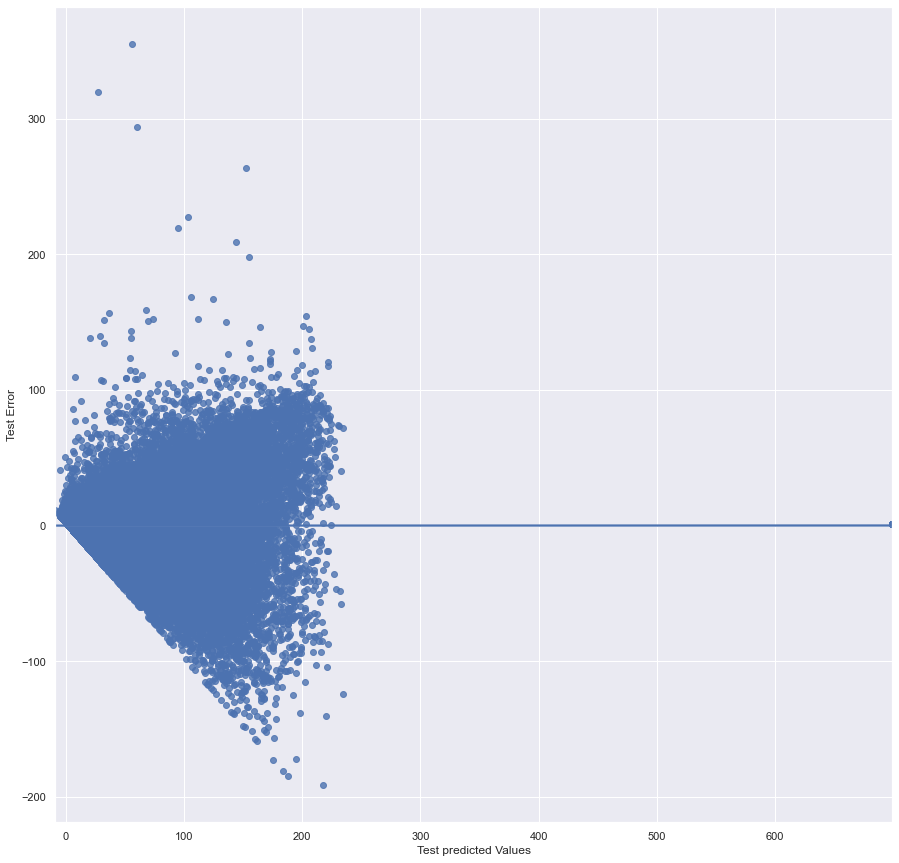

In [168]:
sns.regplot(df_test_error['Y_test_pred'],df_test_error['test_error'])
plt.xlabel('Test predicted Values')
plt.ylabel('Test Error')

**Assumpiton 3 END :** There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation. 

----

**Assumption 5 START:** The error terms must be normally distributed.

<AxesSubplot:xlabel='train_error', ylabel='Count'>

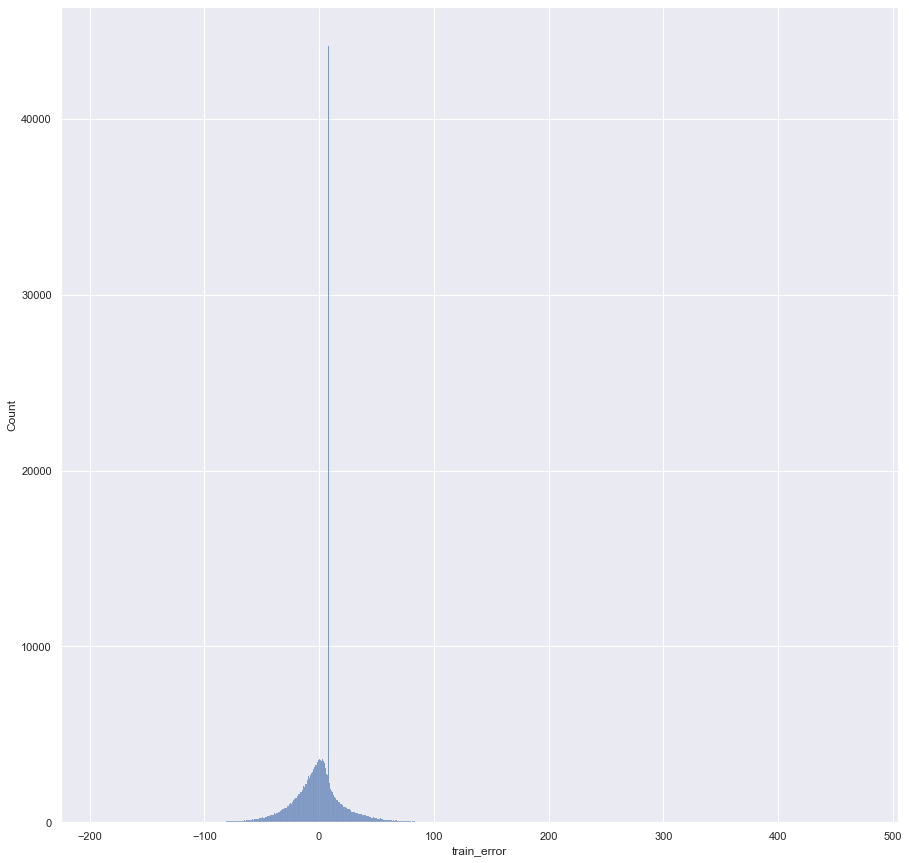

In [169]:
sns.histplot(df_train_error['train_error'],stat='count')

<AxesSubplot:xlabel='test_error', ylabel='Count'>

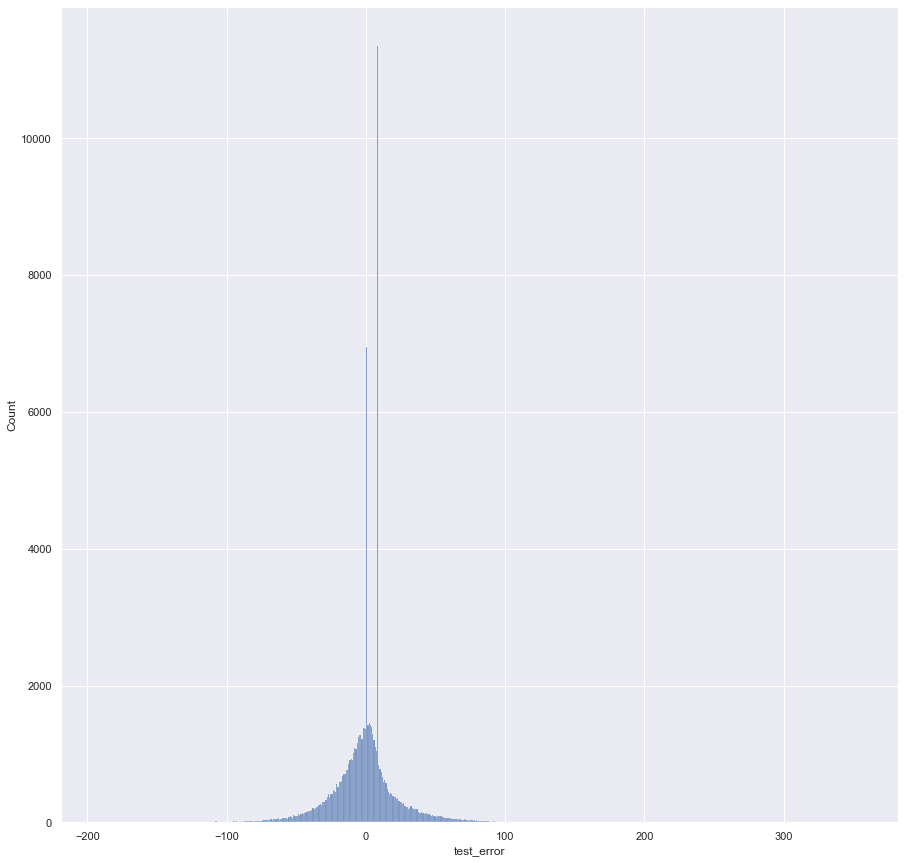

In [170]:
sns.histplot(df_test_error['test_error'],stat='count')

**Assumption 5 END:** The error terms must be normally distributed.

----

## **8.4 Model evaluation** 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.

For example, if a model **predicts** that the **price** of apple is `Rs75/kg`, but the **actual price** of apple is `Rs100/kg`, then the **error** in prediction will be `Rs25/kg`.

Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [171]:
from sklearn import metrics

In [172]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)

In [173]:
print('MAE for training set is {}'.format(MAE_train))

MAE for training set is 15.550332793103514


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [174]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)

In [175]:
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 544.8615223252175


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [176]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

In [177]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 23.34226900550196


In [178]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [179]:
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 23.417228878609322


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 

- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.

- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.

### **8.4.1 Model Evaluation using R-squared and Adjusted R-squared value**

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/r-square-vs-adjusted-r-square-2-638.jpg" width="500" height="240" /></center>

- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)


- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. 


- But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. 


- Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.


There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/maxresdefault.jpg" width="500" height="240"/></center>
<br> 

- **R squared** value increase if we increase the number of independent variables. **Adjusted R-squared** increases only if a significant variable is added.  

 
- **R-squared** value should be near to adjusted **R-squared**. If not, use variable selection techniques to bring **R squared** near to **Adj- R squared**.  A difference of 2% between **R square** and **Adj-R** square is acceptable.

In [180]:
r2_train = metrics.r2_score(y_train,y_pred_train)
print("R2 score for training set is {}".format(r2_train))

R2 score for training set is 0.9817762495452286


In [181]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))

Adjusted R2 score for training set is 0.9817760190362659


### **8.4.2 Model Evaluation using Statsmodel**


In [182]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [183]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    97.840471
x1       95.074181
x2       95.838859
x3      -19.336751
x4       14.910759
dtype: float64

In [184]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.259e+06
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:56:28   Log-Likelihood:            -1.4450e+06
No. Observations:              316240   AIC:                         2.890e+06
Df Residuals:                  316235   BIC:                         2.890e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.8405      0.042   2357.113      0.000      97.759      97.922
x1            95.0742      0.170    559.492      0.000      94.741      95.407
x2            95.8389      0.366    262.026      0.000      95.122      96.556
x3           -19.3368      0.369    -52.399      0.000     -20.060     -18.613
x4            14.9108      0.060    249.728      0.000      14.794      15.028
==============================================================================
Omnibus:                    42209.740   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           568349.860
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       9.568   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **9 Predicting Test/future data** 

In [185]:
df_future=pd.read_csv('beijing_test.csv')

In [186]:
df_future.head()

REF_NO  year  month  day  hour   PM10   SO2    NO2      CO    O3  TEMP  \
0   33649  2017      1    1     0  496.0   8.0  121.0  6100.0   4.0  -4.7   
1   33650  2017      1    1     1  497.0   7.0  113.0  6300.0   4.0  -5.2   
2   33651  2017      1    1     2  469.0   7.0  111.0  6200.0   4.0  -5.4   
3   33652  2017      1    1     3  425.0   6.0  109.0  5900.0   3.0  -5.2   
4   33653  2017      1    1     4  468.0  10.0  123.0  7700.0  16.0  -5.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1022.1  -6.1   0.0  ENE   1.0  Aotizhongxin  
1  1022.3  -6.4   0.0    E   0.7  Aotizhongxin  
2  1022.5  -6.5   0.0  ENE   1.1  Aotizhongxin  
3  1022.5  -6.2   0.0    E   1.1  Aotizhongxin  
4  1021.9  -5.8   0.0  ENE   1.0  Aotizhongxin

## 9.1 Drop Columns if any before splitting data

In [187]:
df_future.drop(['REF_NO','O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'], axis = 1, inplace=True)

In [188]:
df_future.drop(['year', 'month', 'day', 'hour'], axis = 1,inplace=True)

In [189]:
df_future.drop(['wd'], axis = 1,inplace=True)

In [190]:
df_future.drop(['station'], axis = 1,inplace=True)

In [191]:
df_future.head()

PM10   SO2    NO2      CO
0  496.0   8.0  121.0  6100.0
1  497.0   7.0  113.0  6300.0
2  469.0   7.0  111.0  6200.0
3  425.0   6.0  109.0  5900.0
4  468.0  10.0  123.0  7700.0

In [193]:
feature_cols_future = ['PM10', 'SO2', 'NO2', 'CO']
X_future = df_future[feature_cols_future]

## **9.2 Train and Test Data Preparation**

In [195]:
X_future['PM10'] = X_future['PM10'].fillna(X_future['PM10'].median())
X_future['SO2'] = X_future['SO2'].fillna(X_future['SO2'].median())
X_future['NO2'] = X_future['NO2'].fillna(X_future['NO2'].median())
X_future['CO'] = X_future['CO'].fillna(X_future['CO'].median())

In [196]:
X_future.isna().sum()

PM10    0
SO2     0
NO2     0
CO      0
dtype: int64

## **9.3 Data Standardization**

In [197]:
X_future = scaler.transform(X_future)

In [198]:
X_future

array([[ 2.21867284, -0.28650669,  0.21407122,  9.53218834],
       [ 2.22450989, -0.29216549,  0.16738548,  9.88840112],
       [ 2.06107232, -0.29216549,  0.15571405,  9.71029473],
       ...,
       [-0.51306954, -0.3091419 , -0.27029332, -0.44176966],
       [-0.54225482, -0.3091419 , -0.31697906, -0.61987605],
       [-0.56560305, -0.3091419 , -0.27029332, -0.26366327]])

## **9.4 Model Application**

In [202]:
y_pred_future = linreg.predict(X_future)

In [203]:
y_pred_future

array([419.31321755, 425.53999116, 407.57128343, ...,  18.07247249,
        13.54475482,  15.7335937 ])

## **9.5 Concatinate X and Y future**

In [204]:
y_pred_future=pd.Series(y_pred_future)

In [205]:
y_pred_future

0        419.313218
1        425.539991
2        407.571283
3        374.869586
4        447.124725
            ...    
16723     18.674065
16724     19.411421
16725     18.072472
16726     13.544755
16727     15.733594
Length: 16728, dtype: float64

In [206]:
df_future_final=pd.read_csv('beijing_test.csv')

In [207]:
df_future_final['y_pred_future']=y_pred_future

In [208]:
df_future_final

REF_NO  year  month  day  hour   PM10   SO2    NO2      CO    O3  TEMP  \
0       33649  2017      1    1     0  496.0   8.0  121.0  6100.0   4.0  -4.7   
1       33650  2017      1    1     1  497.0   7.0  113.0  6300.0   4.0  -5.2   
2       33651  2017      1    1     2  469.0   7.0  111.0  6200.0   4.0  -5.4   
3       33652  2017      1    1     3  425.0   6.0  109.0  5900.0   3.0  -5.2   
4       33653  2017      1    1     4  468.0  10.0  123.0  7700.0  16.0  -5.0   
...       ...   ...    ...  ...   ...    ...   ...    ...     ...   ...   ...   
16723   35060  2017      2   28    19   32.0   3.0   24.0   400.0  72.0  12.5   
16724   35061  2017      2   28    20   32.0   3.0   41.0   500.0  50.0  11.6   
16725   35062  2017      2   28    21   28.0   4.0   38.0   500.0  54.0  10.8   
16726   35063  2017      2   28    22   23.0   4.0   30.0   400.0  59.0  10.5   
16727   35064  2017      2   28    23   19.0   4.0   38.0   600.0  49.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM        station  y_pred_future  
0      1022.1  -6.1   0.0  ENE   1.0   Aotizhongxin     419.313218  
1      1022.3  -6.4   0.0    E   0.7   Aotizhongxin     425.539991  
2      1022.5  -6.5   0.0  ENE   1.1   Aotizhongxin     407.571283  
3      1022.5  -6.2   0.0    E   1.1   Aotizhongxin     374.869586  
4      1021.9  -5.8   0.0  ENE   1.0   Aotizhongxin     447.124725  
...       ...   ...   ...  ...   ...            ...            ...  
16723  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong      18.674065  
16724  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong      19.411421  
16725  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong      18.072472  
16726  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong      13.544755  
16727  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong      15.733594  

[16728 rows x 18 columns]

In [209]:
df_future_final[['REF_NO','y_pred_future']].to_csv('submissionv.csv',index=False, header=False)